<a href="https://colab.research.google.com/github/alexkardan/ABS-Visualizations/blob/main/ABS_Weekly_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [360]:
Weekly_High_Volume_Store = pd.read_csv("Montgomery College Data Set (High Volume_Weekly).csv")

*   The High volume store is the Montrose store located on Rockville Pike
*   The medium volume store is located on Old Columbia Pike
*   The low volume store is located in Flower Ave Store located on the corner of Flower Ave and Piney Branch

In [361]:
Weekly_High_Volume_Store.describe()

,Week,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,11.596806,16.113772,16.115768,17.209581,17.055888,19.015968,18.926148,16.564870,15.812375,15.732535,...,22.720559,21.323353,20.904192,20.820359,26.840319,18.720559,21.994012,25.790419,24.700599,13.191617
std,20.220908,21.935201,21.933959,25.298023,25.186522,27.830123,28.241822,23.582075,23.201826,22.824818,...,32.733496,31.449821,31.591372,29.901366,39.455778,26.755967,33.418467,39.302951,36.078223,22.718873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,3.000000,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,4.000000,5.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,6.000000,10.000000,10.000000,11.000000,10.000000,12.000000,11.000000,10.000000,10.000000,9.000000,...,12.000000,12.000000,12.000000,12.000000,16.000000,10.000000,12.000000,15.000000,15.000000,6.000000
75%,13.000000,20.000000,20.000000,22.000000,20.000000,23.000000,24.000000,20.000000,19.000000,19.000000,...,28.000000,24.000000,24.000000,24.000000,31.000000,24.000000,25.000000,29.000000,28.000000,14.000000
max,230.000000,181.000000,181.000000,280.000000,210.000000,240.000000,252.000000,189.000000,260.000000,215.000000,...,224.000000,211.000000,204.000000,216.000000,294.000000,184.000000,290.000000,420.000000,270.000000,211.000000


In [362]:
Weekly_High_Volume_Store.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Week,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
496,18798,TRULY VODKA SELTZER VARIETY 3/8 CANS,24,2.37375,8,8,8,8,16,0,...,0,8,0,0,16,16,0,0,0,394
497,297232,POST MERIDIEM SOUTHSIDE 24/100ML,24,4.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
498,83305,K JACKSON VINT RES S/BLC - 750ML,12,14.99,0,2,2,5,7,4,...,5,1,5,3,9,18,21,12,6,382
499,36722,KETEL ONE VODKA - 750ML,12,27.99,2,8,8,5,5,7,...,2,13,4,9,5,11,10,13,6,399
500,330401,JOSH CELLARS S/BLC - 750ML,12,16.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29


In [363]:
Weekly_High_Volume_Store = pd.read_csv("Montgomery College Data Set (High Volume_Weekly).csv", header=1)  # Change 1 to the correct row index
Weekly_High_Volume_Store = Weekly_High_Volume_Store.loc[:, ~Weekly_High_Volume_Store.columns.str.contains("^Unnamed")]  # Remove unnamed columns


In [364]:
grand_total_column = Weekly_High_Volume_Store.iloc[:, -1]

Weekly_High_Volume_Store = Weekly_High_Volume_Store.iloc[:, :-1]

new_columns = ["Item ID", "Description", "Bottles Per Case", "Cost Amount (Per Bottle)"]

num_weeks = len(Weekly_High_Volume_Store.columns) - len(new_columns)
week_columns = [f"Week {i+1}" for i in range(num_weeks)]

final_columns = new_columns + week_columns

Weekly_High_Volume_Store.columns = final_columns

Weekly_High_Volume_Store = pd.concat([Weekly_High_Volume_Store, grand_total_column], axis=1)

Weekly_High_Volume_Store.columns = list(Weekly_High_Volume_Store.columns[:-1]) + ['Grand Total']

print(Weekly_High_Volume_Store.head())
print(Weekly_High_Volume_Store.columns)

   Item ID                           Description  Bottles Per Case  \
0    18467                   SCOTTY'S VODKA 50ML                96   
1    96741            CORONA EXTRA 4/6 NR - 12OZ                24   
2    70417  FIREBALL CINN WHISKY 50ML/10PK LOOSE               120   
3   249230       FIREBALL WHISKY 10PK SLV - 50ML               120   
4    35211                 SMIRNOFF VODKA - 50ML               120   

   Cost Amount (Per Bottle)  Week 1  Week 2  Week 3  Week 4  Week 5  Week 6  \
0                  0.990000      60      93      93      94      89     114   
1                  1.831667     162       0       0     144     144     132   
2                  1.090000      62     170     170     108     166     141   
3                  1.090000     230     100     100     280     210     240   
4                  0.990000     142     181     181     154     167     224   

   ...  Week 45  Week 46  Week 47  Week 48  Week 49  Week 50  Week 51  \
0  ...      164      170      1

In [365]:
last_column = Weekly_High_Volume_Store.iloc[:, -1]
last_column

,Grand Total
0,7690
1,7478
2,7520
3,7391
4,7404
...,...
495,394
496,29
497,382
498,399


The last column in all of these stores are the grand totals in quantity sold for all of the top 500 items so I wanted to get an idea of what are the differing amounts for visualizations to make sure the numbers are at least accurate and similiar to the dataset and didnt misinterpret them.


In [366]:
quarterly_mapping = {
    'Q1': [f'Week {i}' for i in range(1, 14)],    # Week 1 to Week 13
    'Q2': [f'Week {i}' for i in range(14, 27)],   # Week 14 to Week 26
    'Q3': [f'Week {i}' for i in range(27, 40)],   # Week 27 to Week 39
    'Q4': [f'Week {i}' for i in range(40, 54)]    # Week 40 to Week 53
}

week_to_quarter = {week: quarter for quarter, weeks in quarterly_mapping.items() for week in weeks}

week_columns = [f'Week {i}' for i in range(1, 54)]

def get_week_number(week_col):
    return int(week_col.split(' ')[1])

melted_Weekly_High_Volume_Store = Weekly_High_Volume_Store.melt(
    id_vars=["Item ID", "Description", "Bottles Per Case", "Cost Amount (Per Bottle)"],
    value_vars=week_columns,
    var_name="Week",
    value_name="Quantity"
)


for week_col in week_columns:
    week_number = get_week_number(week_col)

    melted_Weekly_High_Volume_Store[f'{week_col}_quarter'] = week_to_quarter[f'Week {week_number}']


print(melted_Weekly_High_Volume_Store[melted_Weekly_High_Volume_Store["Week"].isin(["Week 1", "Week 35"])].head())



   Item ID                           Description  Bottles Per Case  \
0    18467                   SCOTTY'S VODKA 50ML                96   
1    96741            CORONA EXTRA 4/6 NR - 12OZ                24   
2    70417  FIREBALL CINN WHISKY 50ML/10PK LOOSE               120   
3   249230       FIREBALL WHISKY 10PK SLV - 50ML               120   
4    35211                 SMIRNOFF VODKA - 50ML               120   

   Cost Amount (Per Bottle)    Week  Quantity Week 1_quarter Week 2_quarter  \
0                  0.990000  Week 1        60             Q1             Q1   
1                  1.831667  Week 1       162             Q1             Q1   
2                  1.090000  Week 1        62             Q1             Q1   
3                  1.090000  Week 1       230             Q1             Q1   
4                  0.990000  Week 1       142             Q1             Q1   

  Week 3_quarter Week 4_quarter  ... Week 44_quarter Week 45_quarter  \
0             Q1             Q1 

In [367]:
Weekly_High_Volume_Store.columns

Index(['Item ID', 'Description', 'Bottles Per Case',
       'Cost Amount (Per Bottle)', 'Week 1', 'Week 2', 'Week 3', 'Week 4',
       'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11',
       'Week 12', 'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17',
       'Week 18', 'Week 19', 'Week 20', 'Week 21', 'Week 22', 'Week 23',
       'Week 24', 'Week 25', 'Week 26', 'Week 27', 'Week 28', 'Week 29',
       'Week 30', 'Week 31', 'Week 32', 'Week 33', 'Week 34', 'Week 35',
       'Week 36', 'Week 37', 'Week 38', 'Week 39', 'Week 40', 'Week 41',
       'Week 42', 'Week 43', 'Week 44', 'Week 45', 'Week 46', 'Week 47',
       'Week 48', 'Week 49', 'Week 50', 'Week 51', 'Week 52', 'Week 53',
       'Grand Total'],
      dtype='object')

In [368]:
def categorize_items(Description):

  if 'WHISKEY' in Description :
    return 'Whiskey'
  elif 'BEER' in Description:
    return 'Beer'
  elif 'WINE' in Description:
    return 'Wine'
  elif 'VODKA' in Description:
    return 'Vodka'
  elif 'TEQUILA' in Description:
    return 'Tequila'
  elif 'CORONA':
    return 'Corona'
  else:
    return 'Other'

In [369]:
Weekly_High_Volume_Store['Description'] = Weekly_High_Volume_Store['Description'].apply(categorize_items)

In [370]:
melted_sales_data = Weekly_High_Volume_Store.melt(id_vars=['Item ID', 'Description', 'Bottles Per Case'],
                                                         value_vars= week_columns,
                                                         var_name='Week', value_name='Quantity Total')

melted_sales_data['Quarter'] = melted_sales_data['Week'].map(week_to_quarter)




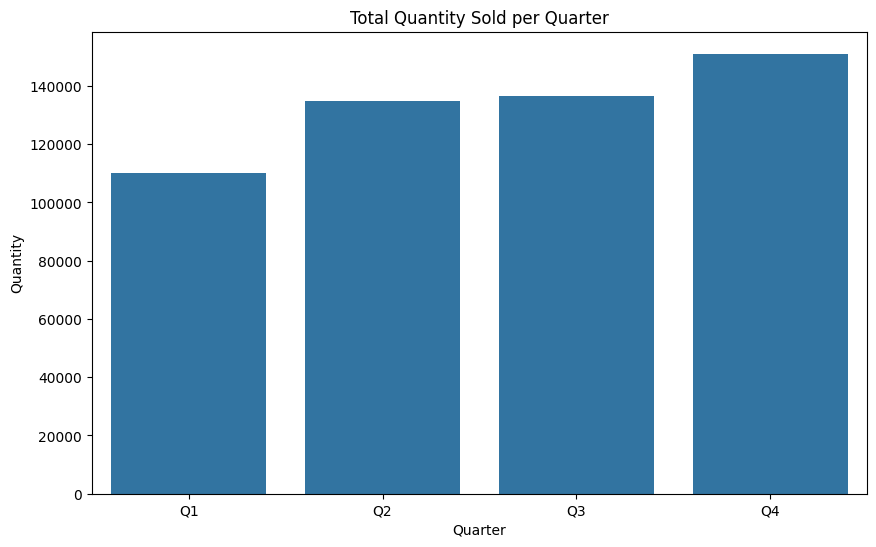

In [371]:
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Quantity Total', data=quarterly_sales, estimator=sum, errorbar=None)
plt.title('Total Quantity Sold per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Quantity')
plt.show()

In [372]:
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].sum().reset_index()

quarterly_sales["Quarter Velocity"] = quarterly_sales["Quantity Total"]/13

In [373]:
fig = px.box(quarterly_sales,
       x = "Quarter",
       y = "Quarter Velocity",
)

fig.show()

In [374]:
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].sum().reset_index()

quarterly_sales["Quarter Velocity"] = quarterly_sales["Quantity Total"]/52

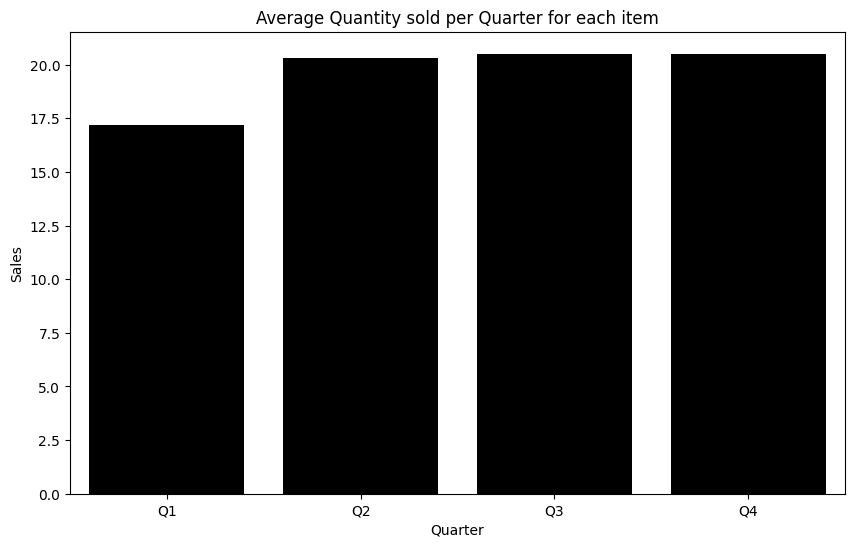

In [375]:
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Quantity Total', color = 'black', data=quarterly_sales, errorbar=None)
plt.title('Average Quantity sold per Quarter for each item')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

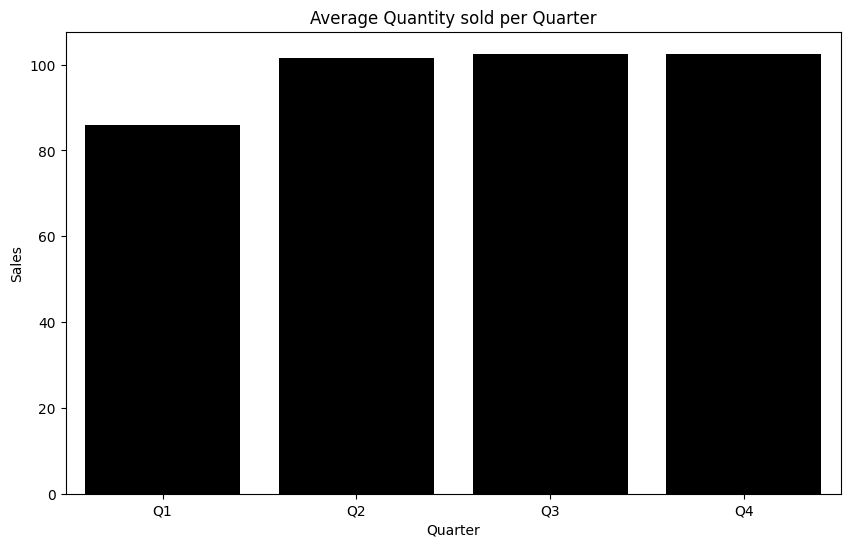

In [376]:
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Quantity Total', color = 'black', data=quarterly_sales, estimator=sum, errorbar=None)
plt.title('Average Quantity sold per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

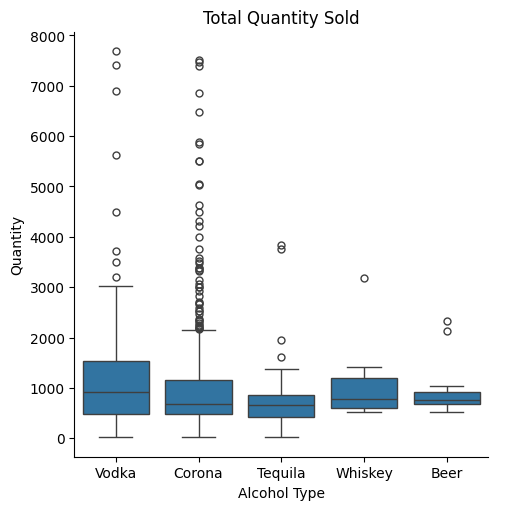

In [377]:
sns.catplot(x = "Description", y = "Grand Total", kind = "box",  data = Weekly_High_Volume_Store)
plt.title('Total Quantity Sold')
plt.xlabel('Alcohol Type')
plt.ylabel('Quantity')
plt.show()

In [378]:
def categorize_items(Description):

  if 'WHISKEY' in Description :
    return 'Whiskey'
  elif 'BEER' in Description:
    return 'Beer'
  elif 'WINE' in Description:
    return 'Wine'
  elif 'VODKA' in Description:
    return 'Vodka'
  elif 'TEQUILA' in Description:
    return 'Tequila'
  elif 'CORONA':
    return 'Corona'
  else:
    return 'Other'

In [379]:
quarterly_sales['Description'] = quarterly_sales['Description'].apply(categorize_items)

In [380]:
print(quarterly_sales.groupby('Description')['Quantity Total'].sum())

Description
Corona    392.552159
Name: Quantity Total, dtype: float64


In [381]:
print(quarterly_sales["Description"].unique())

['Corona']


In [382]:
fig = px.box(quarterly_sales,
            x = "Description",
             y = "Quantity Total",
             color = "Description",
             title = "Total Quantity Sold per Alcohol Type"
             )
fig.show()

In [383]:
fig = px.box(Weekly_High_Volume_Store,
            x = "Description",
             y = "Grand Total",
             color = "Description",
             title = "Total Quantity Sold per Alcohol Type"
             )
fig.show()